             Class         Mean     Variance  Standard Deviation      Entropy  \
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000   
mean      0.447368     9.488890   711.101063           25.182271     0.073603   
std       0.497288     5.728022   467.466896            8.773526     0.070269   
min       0.000000     0.078659     3.145628            1.773592     0.000882   
25%       0.000000     4.982395   363.225459           19.058475     0.006856   
50%       0.000000     8.477531   622.580417           24.951560     0.066628   
75%       1.000000    13.212723   966.954319           31.095889     0.113284   
max       1.000000    33.239975  2910.581879           53.949809     0.394539   

          Skewness     Kurtosis     Contrast       Energy          ASM  \
count  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000   
mean      4.102727    24.389071   127.961459     0.204705     0.058632   
std       2.560940    56.434747   109.499601    

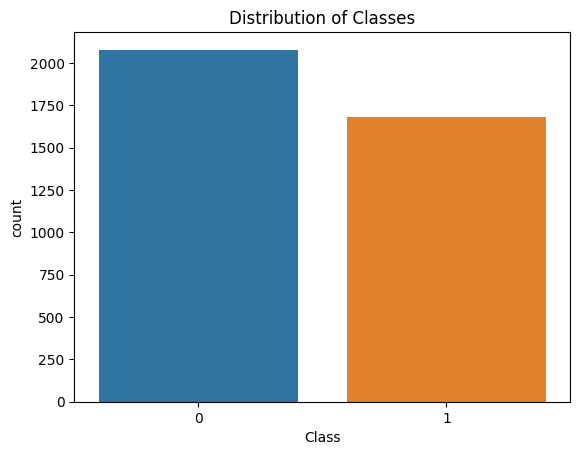

<ipython-input-30-870efe3d9939>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


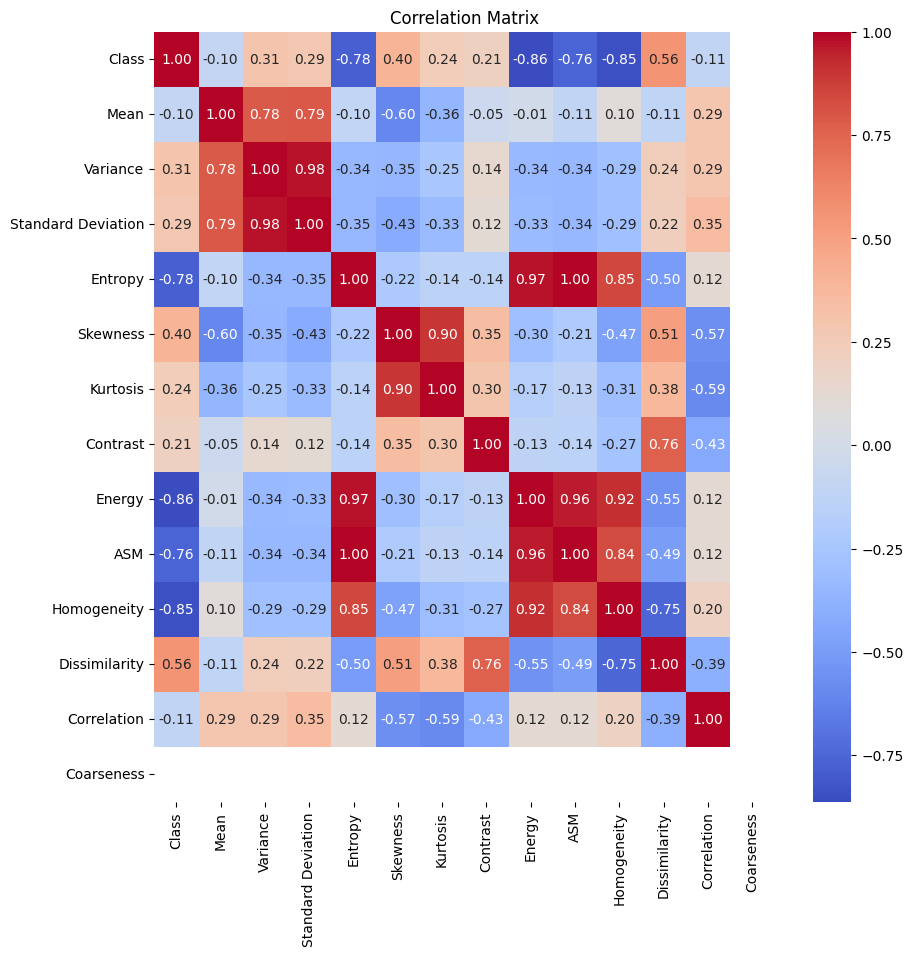

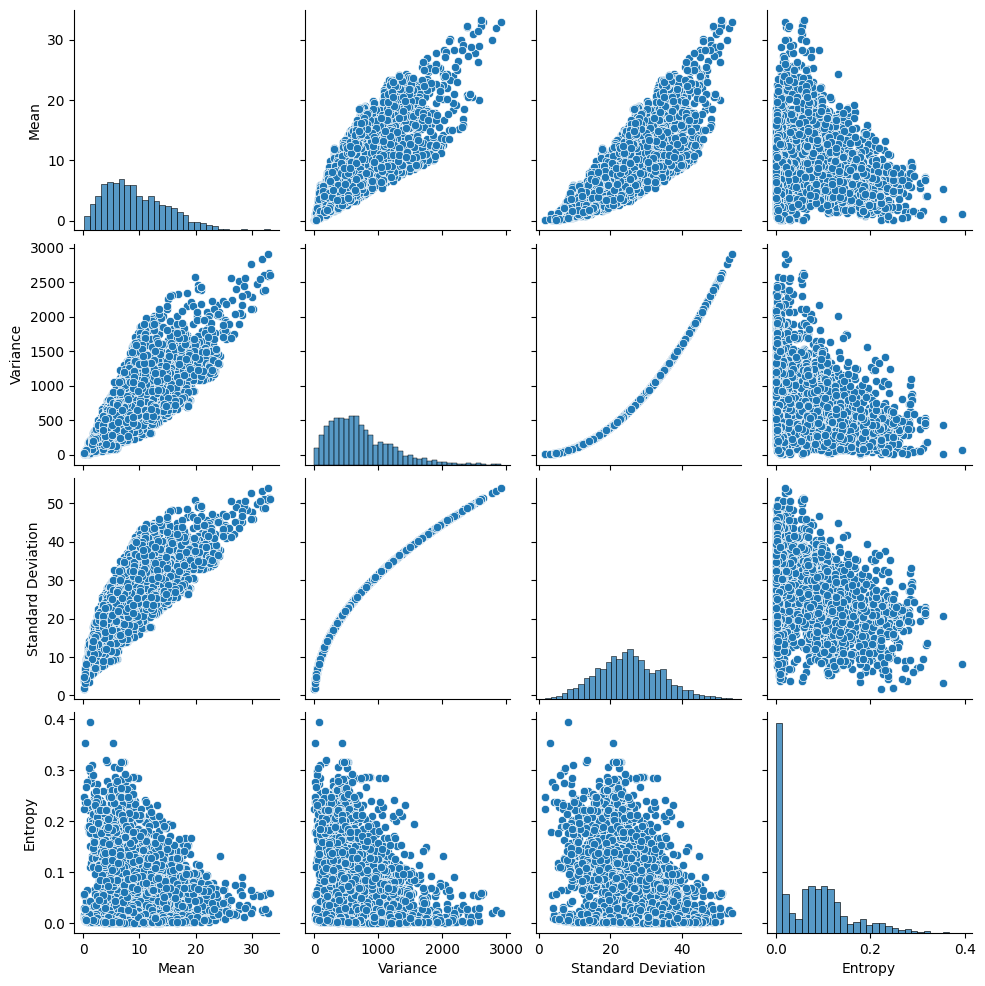

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
data = pd.read_csv('/content/Brain Tumor.csv')


print(data.describe())


sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.show()

# corr m - remind yourself to remove this if it does not provide useful info
corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



selected_features = ["Mean", "Variance", "Standard Deviation", "Entropy"]
sns.pairplot(data[selected_features])
plt.show()


<ipython-input-31-a00c492d20cc>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Selected Features:
Variance
Standard Deviation
Entropy
Skewness
Kurtosis
Contrast
Energy
ASM
Homogeneity
Dissimilarity
Epoch 1/20
76/76 [==============================] - 1s 7ms/step - loss: 0.2654 - accuracy: 0.9418 - val_loss: 0.0817 - val_accuracy: 0.9784
Epoch 2/20
76/76 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 3/20
76/76 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0460 - val_accuracy: 0.9884
Epoch 4/20
76/76 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9801 - val_loss: 0.0427 - val_accuracy: 0.9884
Epoch 5/20
76/76 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9817 - val_loss: 0.0399 - val_accuracy: 0.9900
Epoch 6/20
76/76 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0397 - val_accuracy: 0.9917
Epoch 7/20
76/76 [=======================

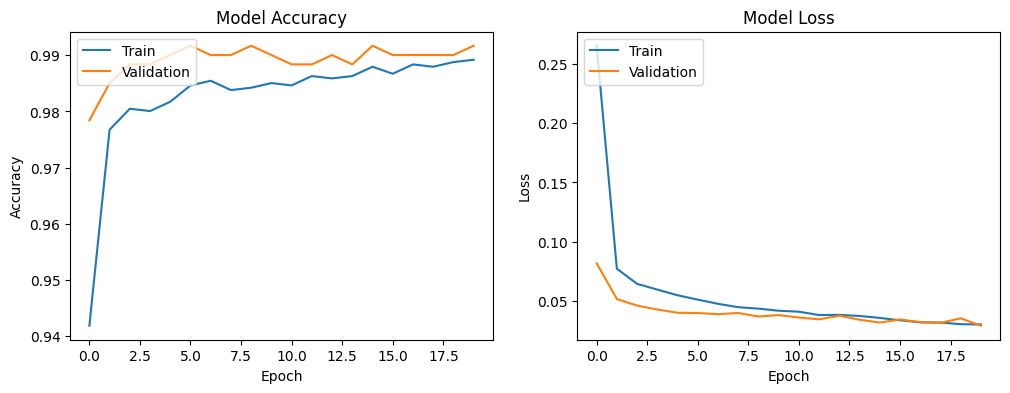

In [31]:
#model 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/Brain Tumor.csv')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

X = data.drop(['Image', 'Class'], axis=1)
y = data['Class']

# Feature engineering
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)


selected_indices = selector.get_support(indices=True)


selected_columns = X.columns[selected_indices]

print("Selected Features:")
for column in selected_columns:
    print(column)


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]  

#performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Precision: %.3f, Recall: %.3f, F1 Score: %.3f, ROC AUC: %.3f' % (precision, recall, f1, roc_auc))


24/24 [==============================] - 0s 1ms/step
Precision: 0.991, Recall: 0.973, F1 Score: 0.982, ROC AUC: 0.983


24/24 [==============================] - 0s 2ms/step


<ipython-input-33-39b6281ba315>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


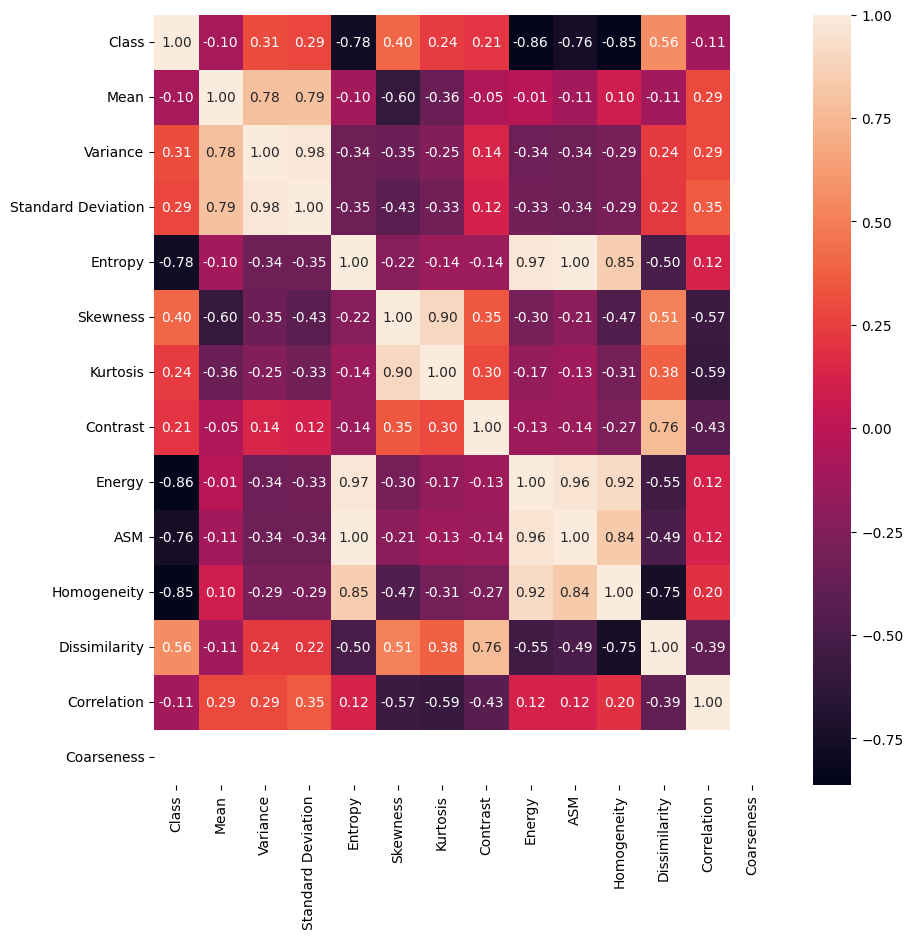

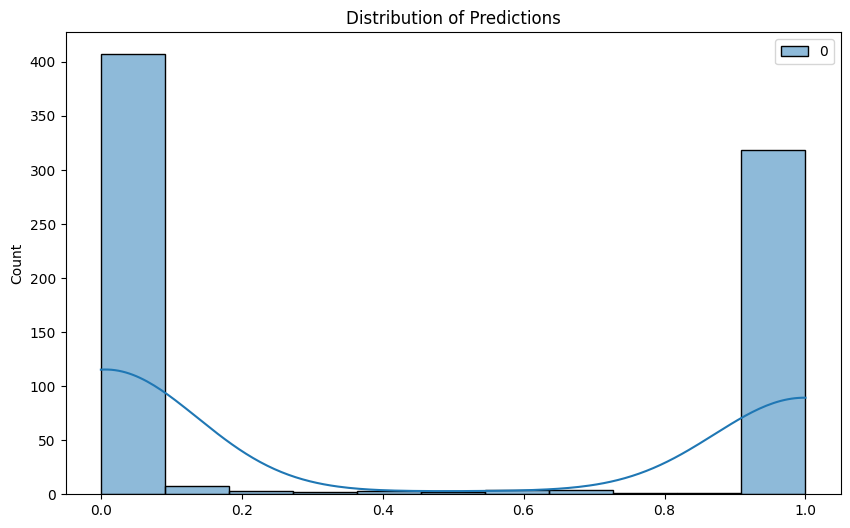

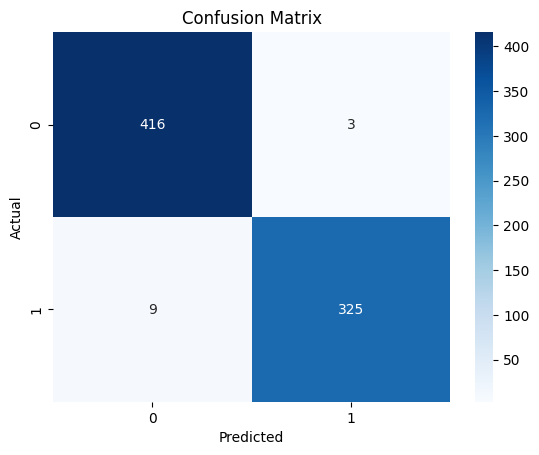

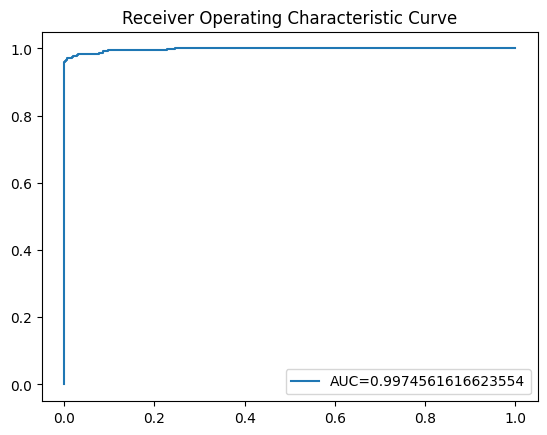

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_proba = model.predict(X_test)

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()


plt.figure(figsize=(10,6))
plt.title('Distribution of Predictions')
sns.histplot(y_pred_proba, kde=True)
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic Curve')
plt.show()

In [34]:
#Image Classificaiton Model #Model2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os


from google.colab import drive
drive.mount('/content/drive')


dataset_directory = '/content/drive/MyDrive/brain_tumor_dataset'

image_size = (330, 330)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

data_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(image_size[0], image_size[1], 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    data_generator,
    steps_per_epoch=data_generator.samples // data_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Epoch 1/10
6/6 [==============================] - 47s 7s/step - loss: 0.7217 - accuracy: 0.5833 - val_loss: 0.6014 - val_accuracy: 0.7188
Epoch 2/10
6/6 [==============================] - 33s 5s/step - loss: 0.5737 - accuracy: 0.7310 - val_loss: 0.5025 - val_accuracy: 0.6562
Epoch 3/10
6/6 [==============================] - 31s 5s/step - loss: 0.5325 - accuracy: 0.7310 - val_loss: 0.4072 - val_accuracy: 0.8438
Epoch 4/10
6/6 [==============================] - 33s 6s/step - loss: 0.4869 - accuracy: 0.7953 - val_loss: 0.3066 - val_accuracy: 0.8750
Epoch 5/10
6/6 [==============================] - 36s 6s/step - loss: 0.4452 - accuracy: 0.7895 - val_loss: 0.2711 - val_accuracy: 0.9062
Epoch 6/10
6/6 [==============================] - 37s 7s/step - loss: 0.4377 - accuracy: 0.8070 - val_loss: 0.2085 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 38s 6s/step - loss: 0.3843 - accuracy: 0.8480 - val_loss: 0.2709 - val_accuracy: 0.9375
Epoch 8/10
6/6 [==================

In [35]:
#testing accuracy on validation set

import pandas as pd


loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')


predictions = model.predict(validation_generator)


binary_predictions = [1 if p > 0.5 else 0 for p in predictions.flatten()]


df_predictions = pd.DataFrame(binary_predictions, columns=['Predictions'])


print(df_predictions)


2/2 [==============================] - 8s 3s/step - loss: 0.2583 - accuracy: 0.9200
Loss: 0.2582961618900299, Accuracy: 0.9200000166893005
2/2 [==============================] - 11s 1s/step
    Predictions
0             1
1             0
2             1
3             0
4             0
5             1
6             1
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            1
15            1
16            1
17            0
18            0
19            0
20            1
21            1
22            0
23            0
24            1
25            0
26            1
27            1
28            1
29            1
30            0
31            1
32            1
33            1
34            1
35            1
36            0
37            1
38            0
39            1
40            1
41            1
42            1
43            1
44            0
45            0
46            1
47            1
48            0
49        

In [36]:
#prediction on unseen data

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd


unseen_dataset_directory = '/content/drive/MyDrive/unseen3'

unseen_datagen = ImageDataGenerator(rescale=1./255)


unseen_data_generator = unseen_datagen.flow_from_directory(
    unseen_dataset_directory,
    target_size=image_size,
    batch_size=32,
    class_mode=None,
    shuffle=False
)
file_names = unseen_data_generator.filenames

predictions = model.predict(unseen_data_generator)


binary_predictions = [1 if p > 0.5 else 0 for p in predictions.flatten()]


df_predictions = pd.DataFrame({'Image': file_names, 'Prediction': binary_predictions})


#print(df_predictions)


Found 205 images belonging to 2 classes.
7/7 [==============================] - 25s 3s/step


In [37]:

df_predictions['TrueLabel'] = df_predictions['Image'].apply(lambda x: 1 if 'glioma_tumor' in x else 0)


correct_predictions = (df_predictions['TrueLabel'] == df_predictions['Prediction']).sum()


accuracy = correct_predictions / len(df_predictions)

print(f'Accuracy: {accuracy * 100}%')


Accuracy: 82.92682926829268%


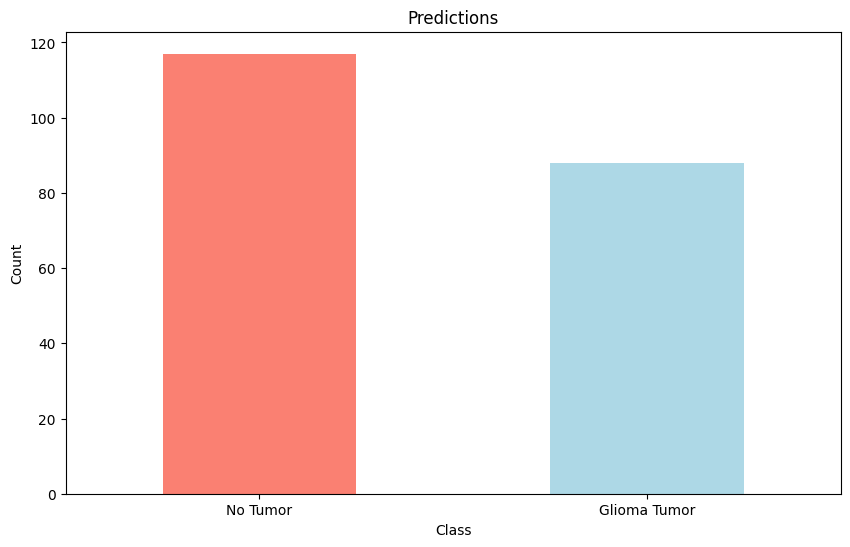

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


plt.figure(figsize=(10, 6))


df_predictions['Prediction'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Predictions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Tumor', 'Glioma Tumor'], rotation=0) 
plt.show()

